## Работа с датасетом FMNIST

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import random
import os
from sklearn.model_selection import train_test_split

from numpy.random import seed
seed(42)
tf.random.set_seed(42)

%matplotlib inline
%load_ext tensorboard

### 0. Загрузка и подготовка данных

In [2]:
# Чтение данных из csv в panda.dataframe

fmnist_df_train = pd.read_csv('fashion-mnist_train.csv', sep=',', header=None, low_memory=False)
fmnist_df_test = pd.read_csv('fashion-mnist_test.csv', sep=',', header=None, low_memory=False)

In [3]:
# Выделение x и y компонент в формате np.array

df_train = fmnist_df_train.iloc[1:].astype(int)
y_train = df_train[0].values
x_train = df_train.drop([0], axis=1).values

df_test = fmnist_df_test.iloc[1:].astype(int)
y_test = df_test[0].values
x_test = df_test.drop([0], axis=1).values

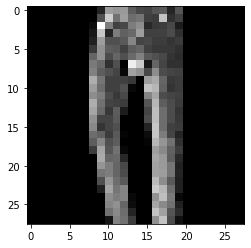

In [4]:
# Пример изображения из датасета FMNIST

data = x_train[random.randint(0, x_train.shape[0])]
data = np.asarray(data).reshape([28, 28])
plt.imshow(data, cmap='gray')
plt.show()

In [5]:
# Нормализация x и перевод y в one-hot (категориальное) представление

x_train = x_train / 255
x_test = x_test / 255

num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [6]:
# Выделение валидационной выборки

x_train, x_valid, y_train, y_valid = train_test_split(
x_train, y_train,
test_size=0.2, random_state=12
)

### 1. Логистическая регрессия

In [7]:
# Модель логистической регрессии (для выполнения обучения заново раскомментируйте ячейку)

# def sgd():
#     model = tf.keras.models.Sequential([
#         tf.keras.layers.Flatten(),
#         tf.keras.layers.Dense(10, activation='softmax')
#     ])

#     model.compile(optimizer='sgd',
#     loss='categorical_crossentropy',
#     metrics=['accuracy'])
#     return model

In [8]:
# Параметры для TensorBoard (для выполнения обучения заново раскомментируйте ячейку)

# logdir_1 = "logs\sgd\\"
# tensorboard_callback_1 = tf.keras.callbacks.TensorBoard(log_dir=logdir_1)

In [9]:
# Запуск обучения модели (для выполнения обучения заново раскомментируйте ячейку)

# model_1 = sgd()

# training_history_1 = model_1.fit(
#     x_train,
#     y_train,
#     verbose=0,
#     epochs=100,
#     validation_data=(x_valid, y_valid),
#     callbacks=[tensorboard_callback_1],
# )

In [10]:
# Оценка качества модели на тестовой выборке (загружается сохраненная модель)

cwd = os.getcwd()
model_1 = tf.keras.models.load_model(os.path.join(cwd, 'models\sgd\\'))
_, sgd_acc = model_1.evaluate(x_test, y_test)
sgd_acc

10000/10000 [==============================] - 0s 31us/sample - loss: 0.4198 - accuracy: 0.8597


0.8597

In [11]:
# График зависимости качества модели на валидационной выборке от количества эпох
# Может не запуститься с первого раза, в таком случае запустите эту ячейку еще раз

%tensorboard --logdir logs/

ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 6116.

Для логистической регрессии качество на валидационных данных составило 0.851, на тестовых - 0.860.

### 2. Полносвязная нейронная сеть

In [12]:
# Модель полносвязной нейронной сети (для выполнения обучения заново раскомментируйте ячейку)

# def neural_network(input_shape):
#     model = tf.keras.models.Sequential()
#     model.add(tf.keras.layers.Dense(512, activation='relu', input_shape=input_shape))
#     model.add(tf.keras.layers.Dropout(0.2))
#     model.add(tf.keras.layers.Dense(512, activation='relu'))
#     model.add(tf.keras.layers.Dropout(0.2))    
#     model.add(tf.keras.layers.Dense(256, activation='relu'))
#     model.add(tf.keras.layers.Dropout(0.2))
#     model.add(tf.keras.layers.Dense(10, activation='softmax'))
#     model.compile(loss='categorical_crossentropy', 
#                   optimizer='adadelta',
#                   metrics=['accuracy'])
#     return model

In [13]:
# Параметры для TensorBoard (для выполнения обучения заново раскомментируйте ячейку)

# logdir_2 = "logs\\neural_network\\"
# tensorboard_callback_2 = tf.keras.callbacks.TensorBoard(log_dir=logdir_2)

In [14]:
# Запуск обучения модели (для выполнения обучения заново раскомментируйте ячейку)

# model_2 = neural_network((784,))

# training_history_2 = model_2.fit(
#     x_train,
#     y_train,
#     verbose=0,
#     epochs=100,
#     validation_data=(x_valid, y_valid),
#     callbacks=[tensorboard_callback_2],
# )

In [15]:
# Оценка качества модели на тестовой выборке (загружается сохраненная модель)

model_2 = tf.keras.models.load_model(os.path.join(cwd, 'models\\neural_network'))
_, nn_acc = model_2.evaluate(x_test, y_test)
nn_acc

10000/10000 [==============================] - 1s 69us/sample - loss: 0.4335 - accuracy: 0.8500


0.85

In [16]:
# График зависимости качества модели на валидационной выборке от количества эпох
# Может не запуститься с первого раза, в таком случае запустите эту ячейку еще раз

%tensorboard --logdir logs/

Reusing TensorBoard on port 6006 (pid 8940), started 0:00:58 ago. (Use '!kill 8940' to kill it.)

Качество полносвязной нейронной сети на валидационных данных - 0.842, на тестовых - 0.850. Это немного ниже, чем качество модели с логистической регрессией. Но по графику качества для модели с логистическое регрессией видно, что к 100 эпохам начинает наступать переобучение. График качества модели полносвязной нейронной сети демонстрирует рост, то есть при увелечении количества эпох качество модели будет продолжать расти. Также, для обучения полносвязной нейросети требуется большее количество данных, чем для обучения логистической регрессии, поэтому с увеличением количества тренировочных данных качество модели полносвязной нейронной сети должно вырасти.

### 3. Сверточная нейронная сеть

In [17]:
# Подготовка данных (для выполнения обучения заново раскомментируйте ячейку)

x_train = x_train.reshape(int(60000 * 0.8), 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_valid = x_valid.reshape(int(60000 * 0.2), 28, 28, 1)

### 3.1 Сверточная сеть № 1

In [18]:
# Модель сверточной нейронной сети № 1 (для выполнения обучения заново раскомментируйте ячейку)

# def conv_net_1(input_shape):
#     model = tf.keras.models.Sequential()
#     model.add(tf.keras.layers.Convolution2D(32, (3,3), input_shape=input_shape, activation='relu'))
#     model.add(tf.keras.layers.MaxPooling2D((2,2)))
#     model.add(tf.keras.layers.Convolution2D(64, (3,3), activation='relu'))
#     model.add(tf.keras.layers.MaxPooling2D((2,2)))
#     model.add(tf.keras.layers.Flatten())
#     model.add(tf.keras.layers.Dense(64, activation='relu'))
#     model.add(tf.keras.layers.Dense(10, activation='softmax'))
#     model.compile(loss='categorical_crossentropy', 
#                   optimizer= 'adadelta', 
#                   metrics=['accuracy'])
#     return model

In [19]:
# Параметры для TensorBoard (для выполнения обучения заново раскомментируйте ячейку)

# logdir_3_1 = "logs\convolution_network_1\\"
# tensorboard_callback_3_1 = tf.keras.callbacks.TensorBoard(log_dir=logdir_3_1)

In [20]:
# Запуск обучения модели (для выполнения обучения заново раскомментируйте ячейку)

# model_3_1 = conv_net_1((28, 28, 1))

# training_history_3_1 = model_3_1.fit(
#     x_train,
#     y_train,
#     verbose=0,
#     epochs=100,
#     validation_data=(x_valid, y_valid),
#     callbacks=[tensorboard_callback_3_1],
# )

In [21]:
# Оценка качества модели на тестовой выборке (загружается сохраненная модель)

model_3_1 = tf.keras.models.load_model(os.path.join(cwd, 'models\convolution_network_1'))
_, cn_1_acc = model_3_1.evaluate(x_test, y_test)
cn_1_acc

10000/10000 [==============================] - 1s 148us/sample - loss: 0.5369 - accuracy: 0.8051


0.8051

In [22]:
# График зависимости качества модели на валидационной выборке от количества эпох
# Может не запуститься с первого раза, в таком случае запустите эту ячейку еще раз

%tensorboard --logdir logs/

Reusing TensorBoard on port 6006 (pid 8940), started 0:01:01 ago. (Use '!kill 8940' to kill it.)

Для сверточной нейронной сети качество на валидационных данных составило 0.799, на тестовых - 0.805, что ниже качества модели полносвязной нейронной сети. 

### 3.2 Сверточная сеть № 2

Добавлены дополнительные сверточные слои.

In [23]:
# Модель сверточной нейронной сети № 2 (для выполнения обучения заново раскомментируйте ячейку)

# def conv_net_2(input_shape):
#     model = tf.keras.models.Sequential()
#     model.add(tf.keras.layers.Convolution2D(32, (3,3), input_shape=input_shape, activation='relu'))
#     model.add(tf.keras.layers.MaxPooling2D((2,2)))
#     model.add(tf.keras.layers.Convolution2D(64, (3,3), activation='relu'))
#     model.add(tf.keras.layers.MaxPooling2D((2,2)))
#     model.add(tf.keras.layers.Convolution2D(64, (3,3), activation='relu'))
#     model.add(tf.keras.layers.Convolution2D(64, (3,3), activation='relu'))
#     model.add(tf.keras.layers.Flatten())
#     model.add(tf.keras.layers.Dense(64, activation='relu'))
#     model.add(tf.keras.layers.Dense(10, activation='softmax'))
#     model.compile(loss='categorical_crossentropy', 
#                   optimizer= 'adadelta', 
#                   metrics=['accuracy'])
#     return model

In [24]:
# Параметры для TensorBoard (для выполнения обучения заново раскомментируйте ячейку)

# logdir_3_2 = "logs\convolution_network_2\\"
# tensorboard_callback_3_2 = tf.keras.callbacks.TensorBoard(log_dir=logdir_3_2)

In [25]:
# Запуск обучения модели (для выполнения обучения заново раскомментируйте ячейку)

# model_3_2 = conv_net_2((28, 28, 1))

# training_history_3_2 = model_3_2.fit(
#     x_train,
#     y_train,
#     verbose=0,
#     epochs=100,
#     validation_data=(x_valid, y_valid),
#     callbacks=[tensorboard_callback_3_2],
# )

In [26]:
# Оценка качества модели на тестовой выборке (загружается сохраненная модель)

model_3_2 = tf.keras.models.load_model(os.path.join(cwd, 'models\convolution_network_2'))
_, cn_2_acc = model_3_2.evaluate(x_test, y_test)
cn_2_acc

10000/10000 [==============================] - 2s 171us/sample - loss: 0.6314 - accuracy: 0.7689


0.7689

In [27]:
# График зависимости качества модели на валидационной выборке от количества эпох
# Может не запуститься с первого раза, в таком случае запустите эту ячейку еще раз

%tensorboard --logdir logs/

Reusing TensorBoard on port 6006 (pid 8940), started 0:01:04 ago. (Use '!kill 8940' to kill it.)

С добавлением дополнительных сверточных слоев качество модели снизилось, и на валидационных данных составило 0.756, на тестовых - 0.769.

### 3.3 Сверточная сеть № 3

Добавлены слои batch-нормализации.

In [28]:
# Модель сверточной нейронной сети № 3 (для выполнения обучения заново раскомментируйте ячейку)

# def conv_net_3(input_shape):
#     model = tf.keras.models.Sequential()
#     model.add(tf.keras.layers.Convolution2D(32, (3,3), input_shape=input_shape, activation='relu'))
#     model.add(tf.keras.layers.BatchNormalization()),
#     model.add(tf.keras.layers.MaxPooling2D((2,2)))
#     model.add(tf.keras.layers.Convolution2D(64, (3,3), activation='relu'))
#     model.add(tf.keras.layers.BatchNormalization()),
#     model.add(tf.keras.layers.MaxPooling2D((2,2)))
#     model.add(tf.keras.layers.Convolution2D(64, (3,3), activation='relu'))
#     model.add(tf.keras.layers.BatchNormalization()),
#     model.add(tf.keras.layers.Convolution2D(64, (3,3), activation='relu'))
#     model.add(tf.keras.layers.BatchNormalization()),
#     model.add(tf.keras.layers.Flatten())
#     model.add(tf.keras.layers.Dense(64, activation='relu'))
#     model.add(tf.keras.layers.BatchNormalization()),
#     model.add(tf.keras.layers.Dense(10, activation='softmax'))
#     model.compile(loss='categorical_crossentropy', 
#                   optimizer= 'adadelta', 
#                   metrics=['accuracy'])
#     return model

In [29]:
# Параметры для TensorBoard (для выполнения обучения заново раскомментируйте ячейку)

# logdir_3_3 = "logs\convolution_network_3\\"
# tensorboard_callback_3_3 = tf.keras.callbacks.TensorBoard(log_dir=logdir_3_3)

In [30]:
# Запуск обучения модели (для выполнения обучения заново раскомментируйте ячейку)

# model_3_3 = conv_net_3((28, 28, 1))

# training_history_3_3 = model_3_3.fit(
#     x_train,
#     y_train,
#     verbose=0,
#     epochs=100,
#     validation_data=(x_valid, y_valid),
#     callbacks=[tensorboard_callback_3_3],
# )

In [31]:
# Оценка качества модели на тестовой выборке (загружается сохраненная модель)

model_3_3 = tf.keras.models.load_model(os.path.join(cwd, 'models\convolution_network_3'))
_, cn_3_acc = model_3_3.evaluate(x_test, y_test)
cn_3_acc

10000/10000 [==============================] - 2s 170us/sample - loss: 0.3729 - accuracy: 0.8766


0.8766

In [32]:
# График зависимости качества модели на валидационной выборке от количества эпох
# Может не запуститься с первого раза, в таком случае запустите эту ячейку еще раз

%tensorboard --logdir logs/

Reusing TensorBoard on port 6006 (pid 8940), started 0:01:11 ago. (Use '!kill 8940' to kill it.)

Добавление слоев batch-нормализации значительно повысило качество модели: на валидационных данных качество составило 0.866, на тестовых - 0.877, что является лучшим результатом среди всех представленных моделей.

### 4. Итоги

In [33]:
# Рейтинг моделей по качеству на тестовых данных

acc = {'sgd': sgd_acc,
       'neural_network': nn_acc, 
       'convolution_network_1': cn_1_acc, 
       'convolution_network_2': cn_2_acc, 
       'convolution_network_3': cn_3_acc}

scores = pd.DataFrame([acc]).T
scores.columns = ['Accuracy']
scores = scores.sort_values('Accuracy', ascending=False)
scores

,Accuracy
convolution_network_3,0.8766
sgd,0.8597
neural_network,0.8500
convolution_network_1,0.8051
convolution_network_2,0.7689
